# Scherben/*fabrics*
ehem. 2.2.1.2

* [Liste aller Scherben/fabrics](#Liste-aller-Scherben/fabrics)
    * [Variabilität](#Variabilität)
    * [Korrespondenzanalyse mit Fabrics und Keramikgruppen](#Korrespondenzanalyse-mit-Fabrics-und-Keramikgruppen)
    * [Angeschliffene Stücke](#Angeschliffene-Stücke)
        * [sicher bestimmte Fabrics an Anschliffen](#sicher-bestimmte-Fabrics-an-Anschliffen)
        * [erste Test-Serie von 2012](#erste-Test-Serie-von-2012)
        * [Material aus dem Inneren Kongobecken](#Material-aus-dem-Inneren-Kongobecken)
        * [Anteil angeschliffen Stücke je fabric](#Anteil-angeschliffen-Stücke-je-fabric)
        * [Anteil angeschliffen Stücke je Stilgruppe](#Anteil-angeschliffen-Stücke-je-Stilgruppe)
    * [Bestimmtung sicher/unsicher](#Bestimmtung-sicher/unsicher)
        * [angeschliffene Stücke](#angeschliffene-Stücke)
        * [insgesamt](#insgesamt)
    * [Fabrics-Tortendiagramme - Export für GIS](#Fabrics-Tortendiagramme---Export-für-GIS)
* [Brennfarbe](#Brennfarbe)
    * [Kartieurng](#Kartierung)
    * [Stilgruppen](#Stilgruppen)

In [2]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'KON'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Liste aller Scherben/*fabrics*

In [2]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Fabric
       FROM t_Obj
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Fabric) Not Like '%?%')
           AND ((t_Obj.Fabric) Not Like '%/%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

Anzahl Stücke mit sicher zugewiesenem *fabric*:

In [3]:
df['Anzahl'].sum()

4630.0

In [4]:
sql = """SELECT
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

a = pd.read_sql(sql, con)
a['Anzahl'] = pd.to_numeric(a['Anzahl'])
b = df['Anzahl'].sum() / a.sum() * 100
print('Anteil Scherben mit eindeutigen fabrics:' , round(b, 2) , '%')

Anteil Scherben mit eindeutigen fabrics: Anzahl    54.68
dtype: float64 %


In [5]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
# display(df_pivot.head())
df_pivot.to_csv('../data/processed/2.2.2 Keramik - Fabrics - DB-Dump.csv', index = True, encoding='utf-8')

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [6]:
len(df_pivot)

27

In [7]:
# df_pivot.sort_index()
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
1d,687.0,14.838013
1b,610.0,13.174946
3a,402.0,8.682505
4a,377.0,8.142549
9a,348.0,7.516199


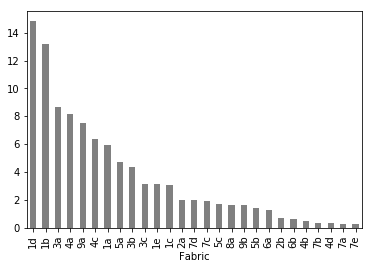

In [8]:
df_pivot['Prozent'].plot(y = 'Fabric', kind = 'bar', color = 'grey', legend = None)

In [9]:
df['FabricGroup'] = df['Fabric'].replace(regex = True, to_replace = r'\D', value = r'')

In [10]:
df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'FabricGroup', aggfunc = sum)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2['Prozent'] = df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100

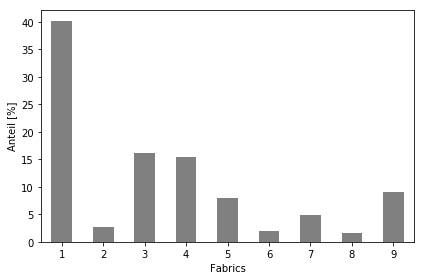

In [11]:
df_pivot2['Prozent'].plot(y = 'Fabric', kind = 'bar', color = 'grey', legend = None)
plt.xlabel('Fabrics')
plt.ylabel('Anteil [%]')
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.savefig('../output/figs/4-1_Fabrics_Pct.pdf', bbox_inches='tight')
plt.show()

In [12]:
s = df_pivot2.sum()
s.name = 'SUM'
df_pivot2 = df_pivot2.append(s)
df_pivot2['Prozent'] = df_pivot2['Prozent'].round(decimals = 2)
df_pivot2 = df_pivot2.reset_index()
df_pivot2 = df_pivot2.rename(columns = {'FabricGroup':'Fabric'})
df_pivot2.to_latex('../output/tabs/4-1_Fabrics_Pct.tex', index = False)
df_pivot2

,Fabric,Anzahl,Prozent
0,1,1859.0,40.15
1,2,127.0,2.74
2,3,749.0,16.18
3,4,714.0,15.42
4,5,366.0,7.90
5,6,88.0,1.90
6,7,229.0,4.95
7,8,75.0,1.62
8,9,423.0,9.14
9,SUM,4630.0,100.00


In [13]:
fabric = df_pivot.index
fabric

Index(['1d', '1b', '3a', '4a', '9a', '4c', '1a', '5a', '3b', '3c', '1e', '1c',
       '2a', '7d', '7c', '5c', '8a', '9b', '5b', '6a', '2b', '6b', '4b', '7b',
       '4d', '7a', '7e'],
      dtype='object', name='Fabric')

Fabrics, die weniger als 10x vorkommen, sollten anderen Typen zugeordnet werden, wenn sie nicht wirklich einzigartig sind:

In [14]:
df_pivot[df_pivot['Anzahl'] < 10]

,Anzahl,Prozent
Fabric,,


## Datenblätter für einzelne Fabrics erzeugen

In [15]:
def fabric_loop(fabric):
    for i in range(len(fabric)):
        sql = """SELECT
                   t_Obj.objID,
                   t_Obj.Anzahl,
                   [t_Obj].[MagerungGröße],
                   [t_Obj].[MagerungDichte],
                   [t_Obj].[MagerungArt],
                   [t_Obj].[Grenze],
                   [t_Obj].[Obfl],
                   t_Obj.Fabric
               FROM t_Obj
               WHERE (((t_Obj.Fabric) = '"""+fabric[i]+"""')
                   AND ((t_Obj.Fabric) Not Like '%?%')
                   AND ((t_Obj.Fabric) Not Like '%/%'))""".replace('\n',' ')

        df = pd.read_sql(sql, con)
        df = df.replace('<1','sehr wenig', regex=True)

        df_si = df.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
        custom_dict_si = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
        df_si = pd.DataFrame(df_si, index=sorted(custom_dict_si, key=custom_dict_si.get))
        df_si['Prozent'] = df_si['Anzahl']/df_si['Anzahl'].sum()*100

        df_den = df.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
        custom_dict_den = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
        df_den = pd.DataFrame(df_den, index=sorted(custom_dict_den, key=custom_dict_den.get))
        df_den['Prozent'] = df_den['Anzahl']/df_den['Anzahl'].sum()*100

        df_type = df.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
        df_type = pd.DataFrame(df_type)
        df_type = df_type.sort_index(by=['Anzahl'], ascending=[False])
        df_type['Prozent'] = df_type['Anzahl']/df_type['Anzahl'].sum()*100

        df_border = df.pivot_table(values = 'Anzahl', index = 'Grenze', aggfunc = sum)

        df_surface = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)

        # Plotten der Daten
        fig = plt.figure(1)
        fig.set_size_inches(10,15)

        ax = plt.subplot(321)

        df_si['Prozent'].plot(kind = 'bar', legend = None, color = 'grey')
        plt.xticks(rotation=0)
        plt.title('Korngröße (Wentworth-Scale)')
        plt.ylabel('Anteil [%]')

        ax = plt.subplot(322)

        df_den['Prozent'].plot(kind = 'bar', legend = None, color = 'grey')
        plt.xticks(rotation=0)
        plt.title('Anteil nicht-plastische Partikel')
        plt.ylabel('Anteil [%]')

        ax = plt.subplot(323)

        df_type['Prozent'].plot(kind = 'barh', legend = False, color = 'Grey')
        plt.xlabel('Anteil [%]')
        plt.ylabel('')
        plt.title('Art nicht-plastische Partikel')

        ax = plt.subplot(324)

        df_border.plot(kind = 'barh', legend = False, color = 'Grey')
        plt.xlabel('Anzahl [n]')
        plt.ylabel('')
        plt.title('Grenze')

        ax = plt.subplot(325)

        df_surface.plot(kind = 'barh', legend = False, color = 'Grey')
        plt.xlabel('Anzahl [n]')
        plt.ylabel('')
        plt.title('Oberfläche')

        fig.suptitle('Fabric: '""+fabric[i]+"", fontsize = 14, fontweight='bold')

        plt.savefig("""../misc/Systematik/Fabrics/output/4-1_Farbic_"""+fabric[i]+""".jpg""", bbox_inches='tight')
        #plt.show()

    return

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


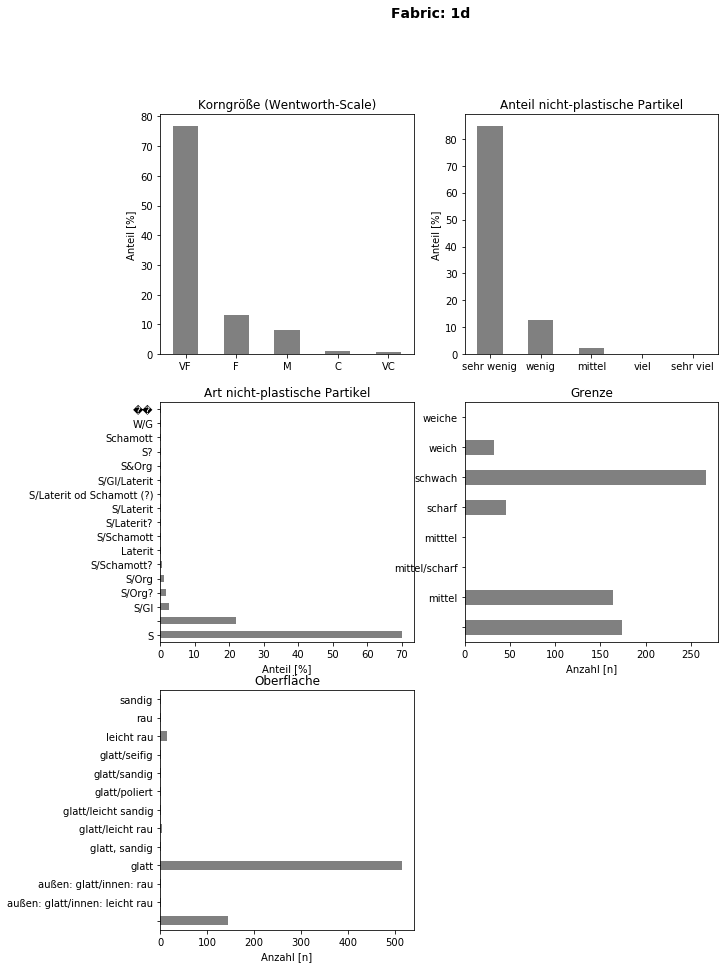

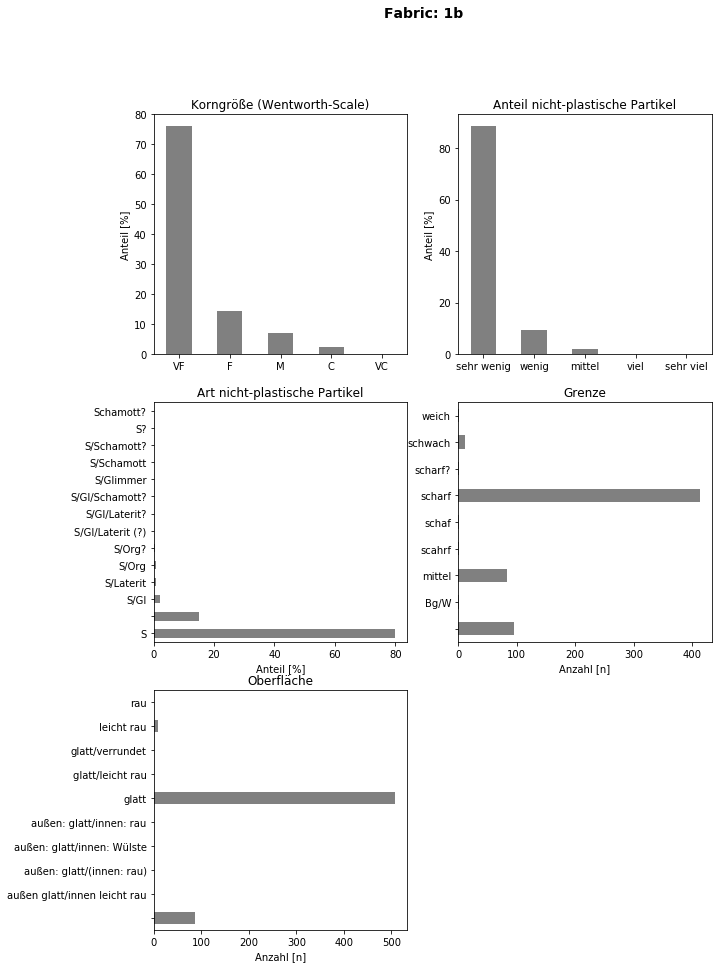

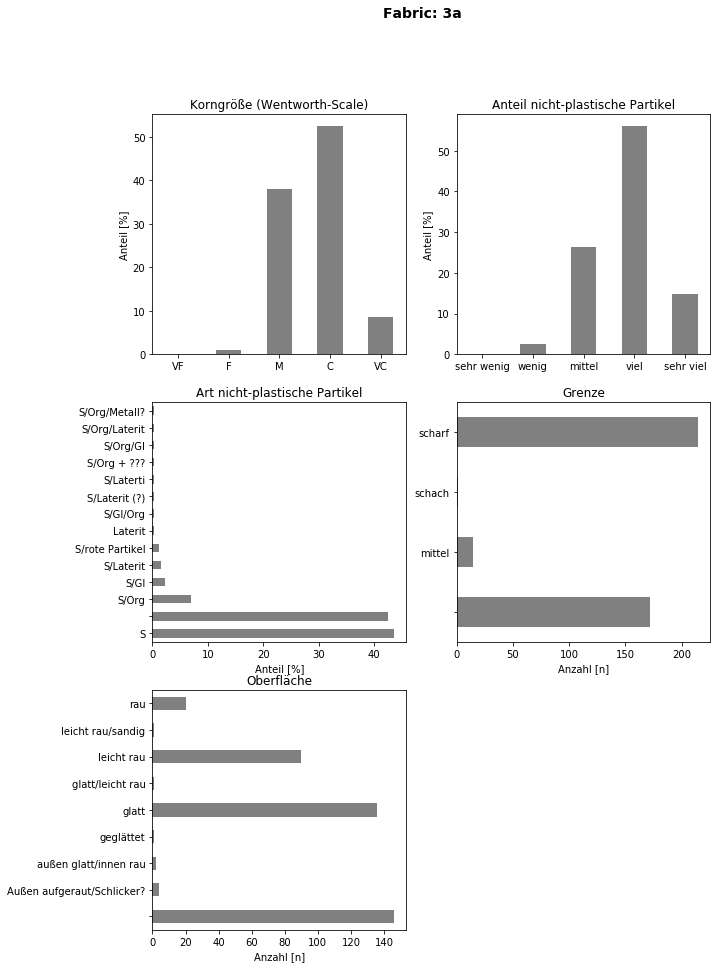

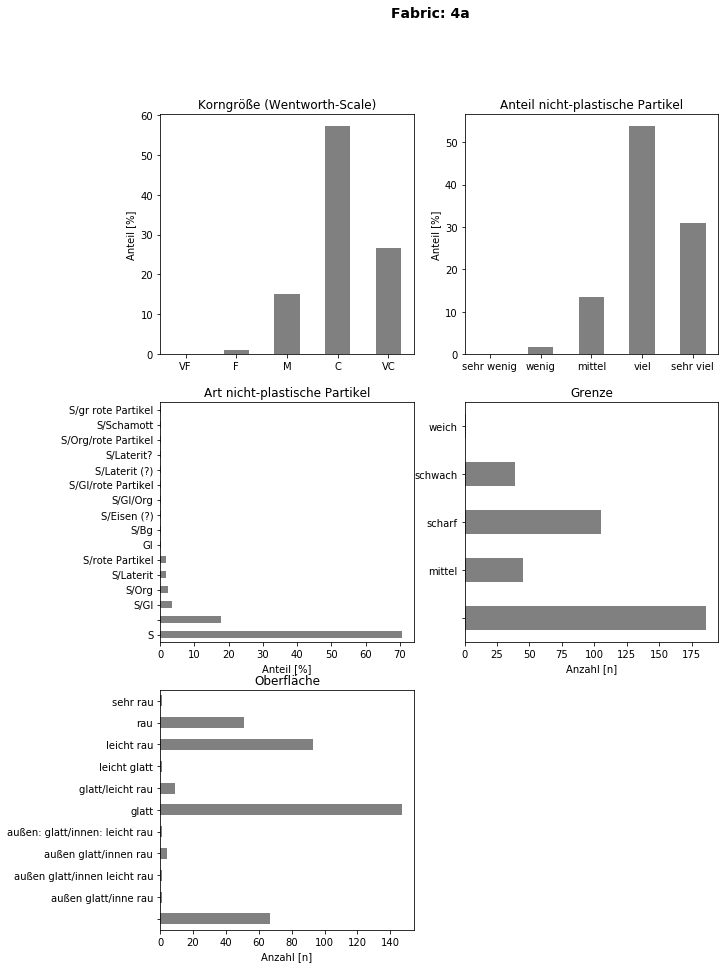

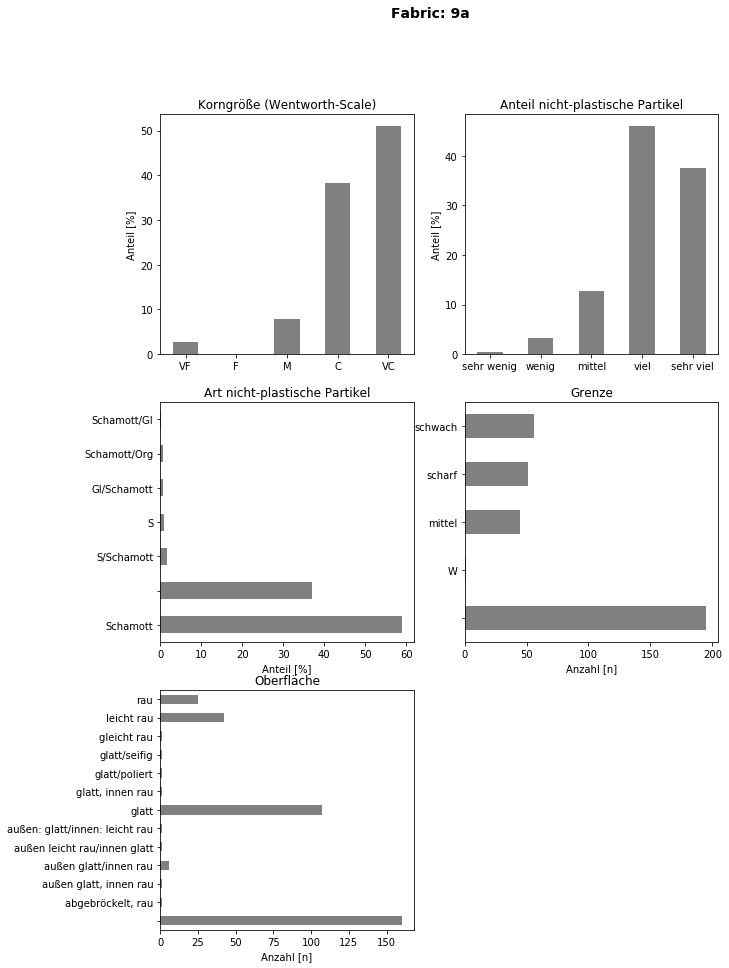

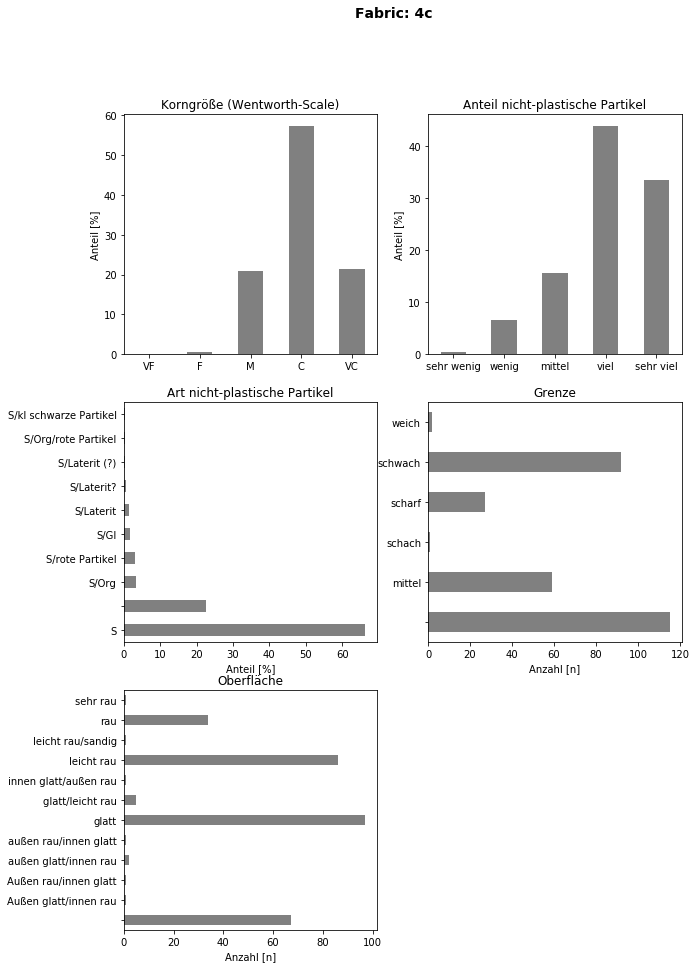

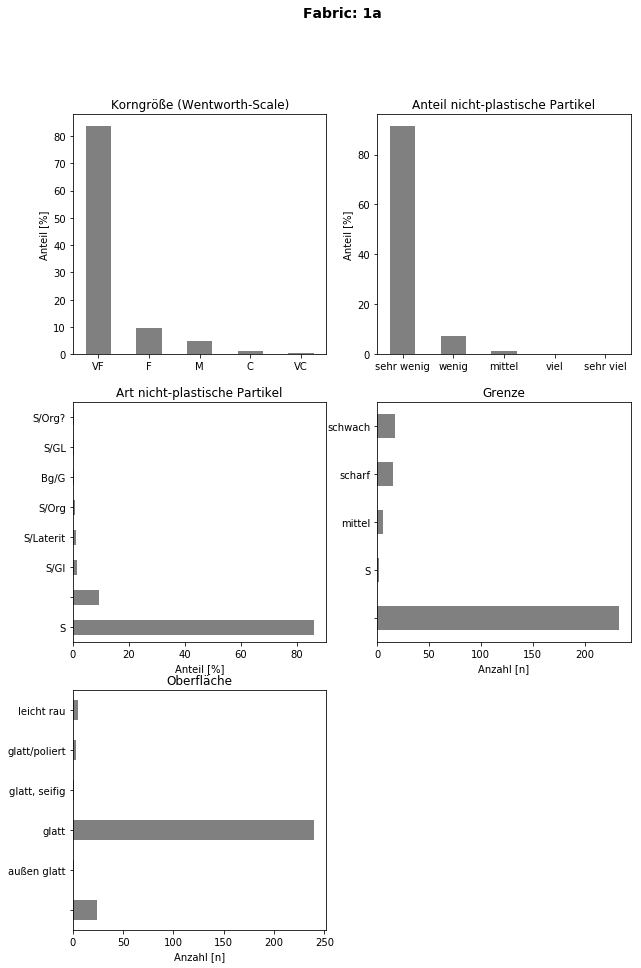

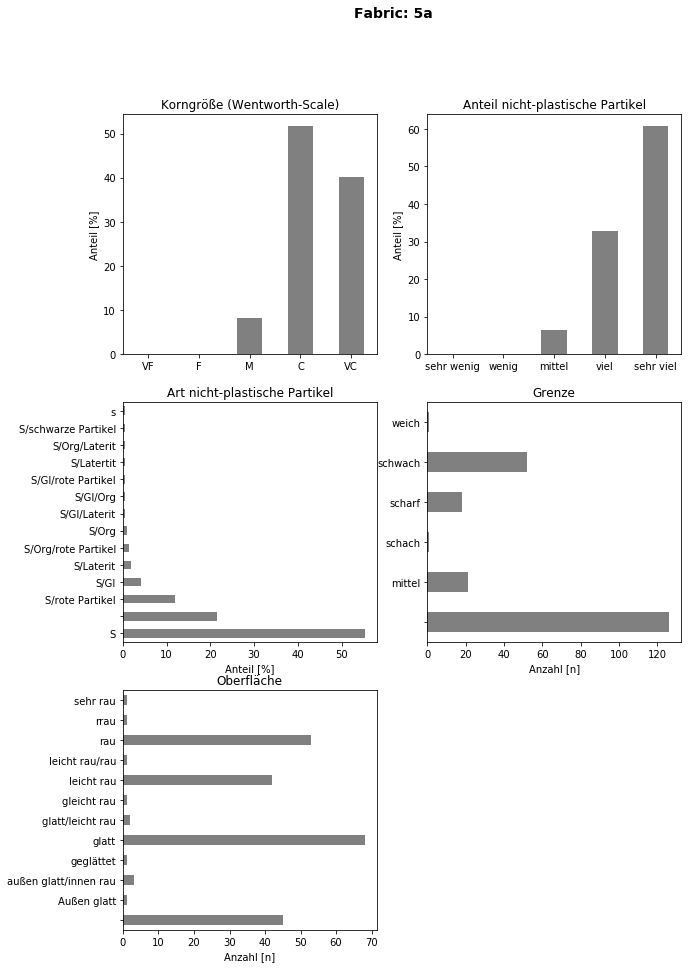

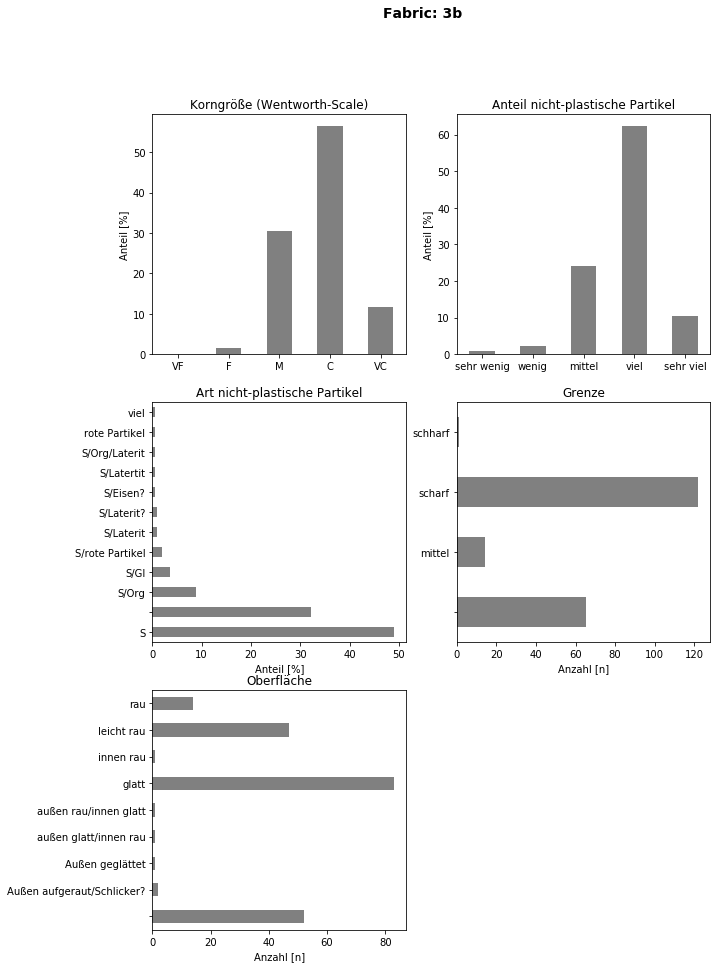

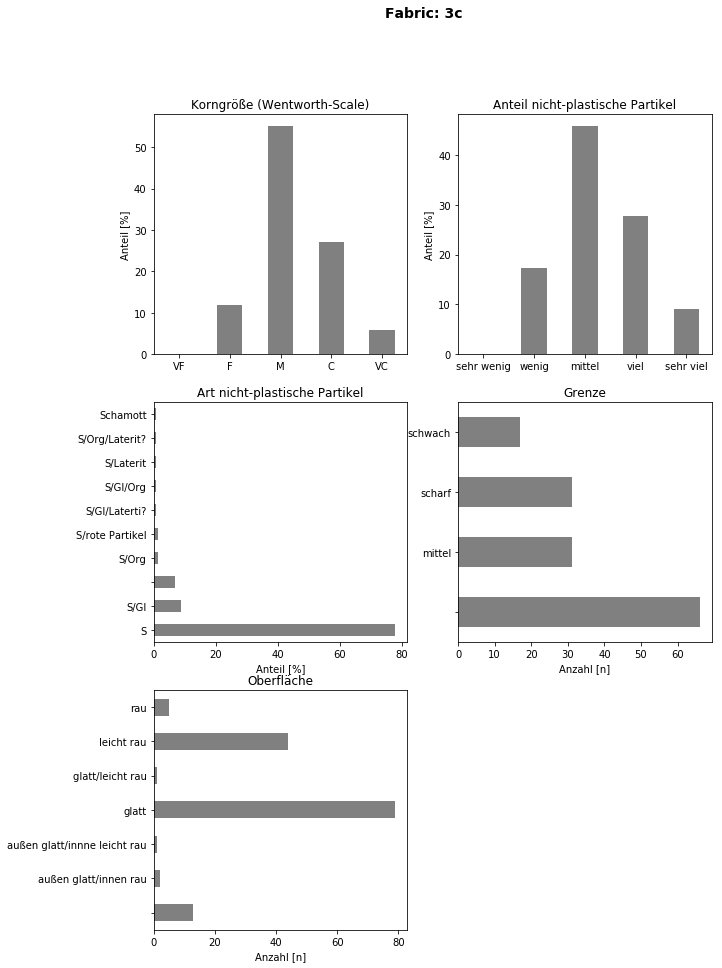

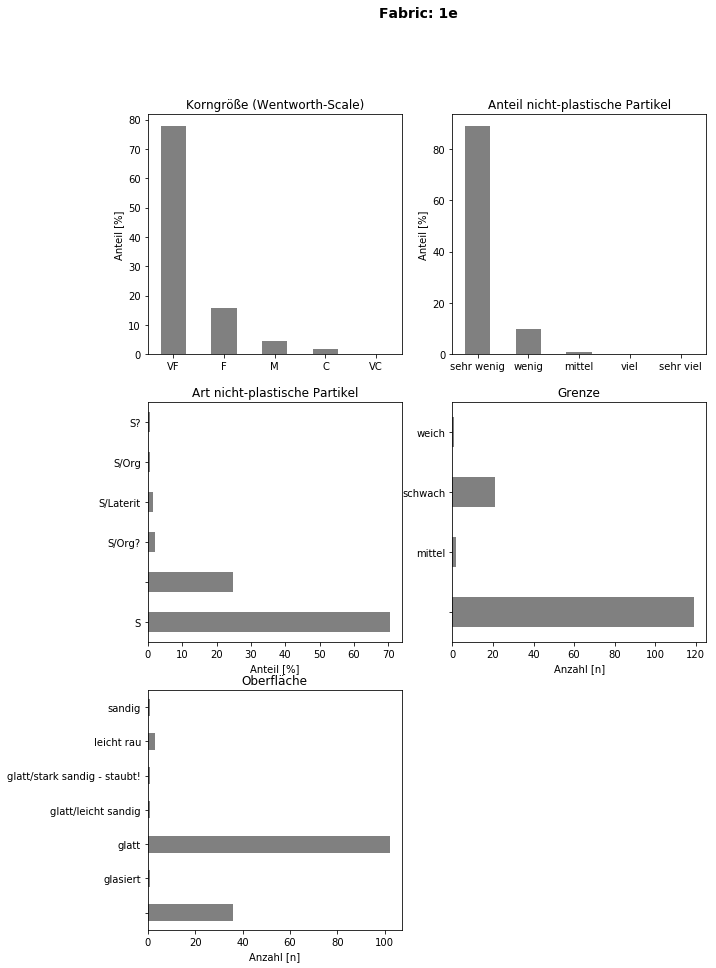

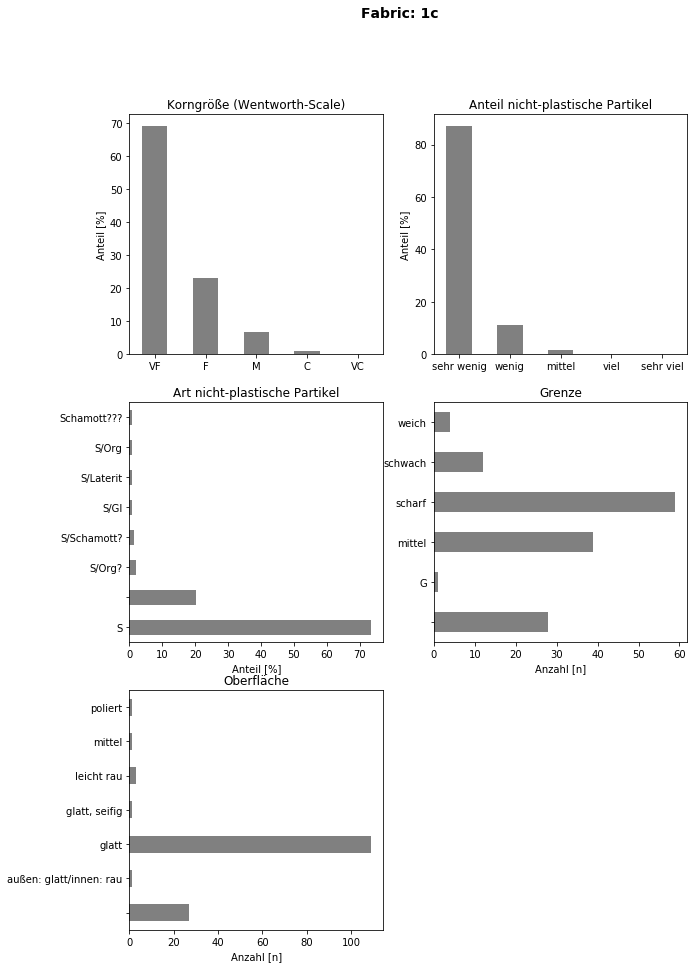

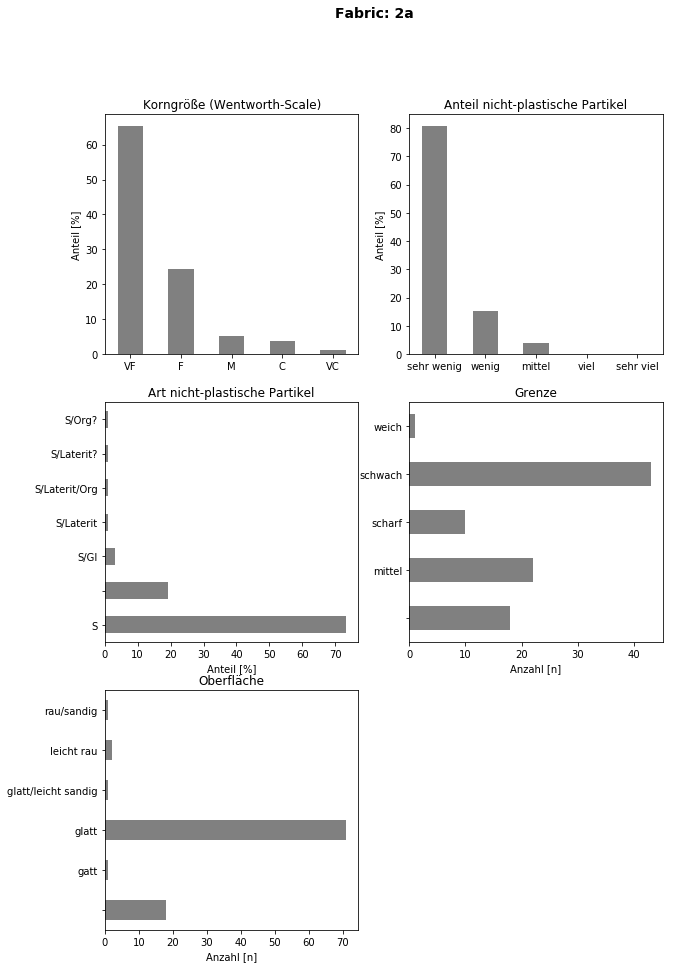

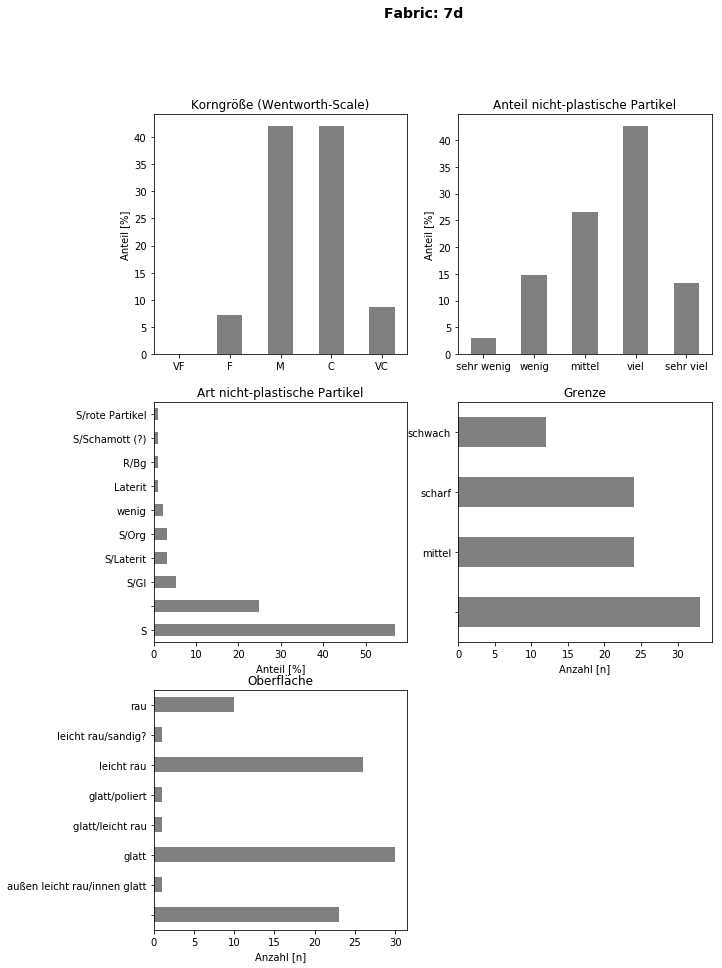

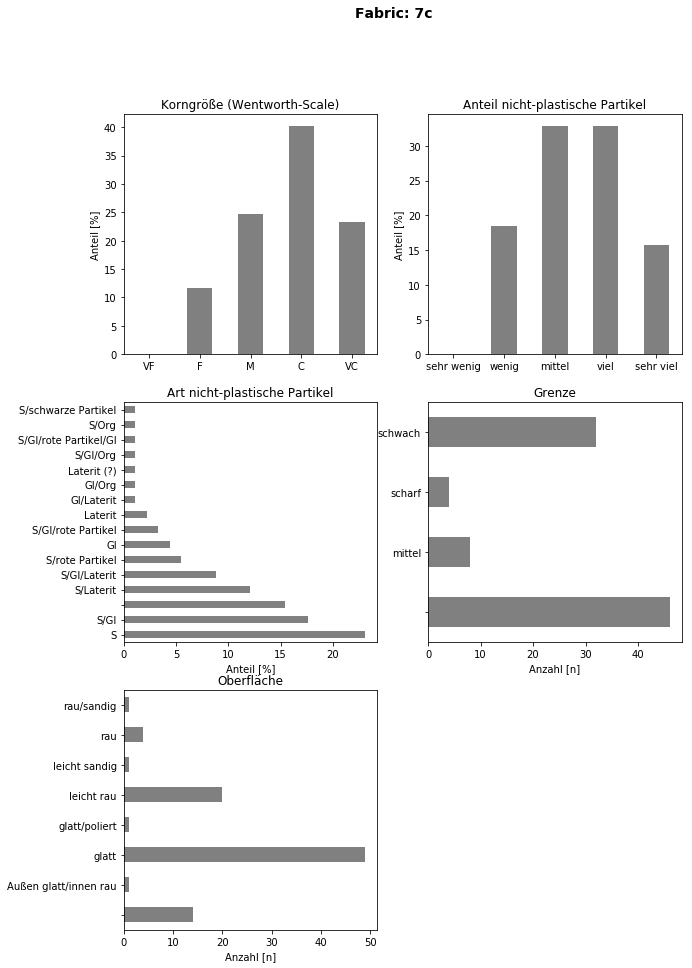

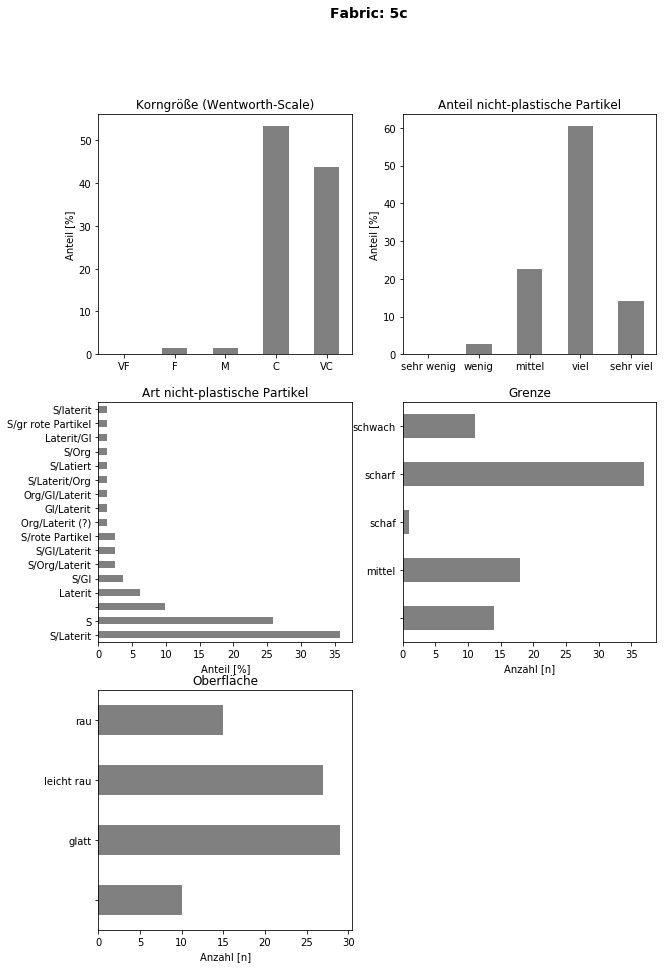

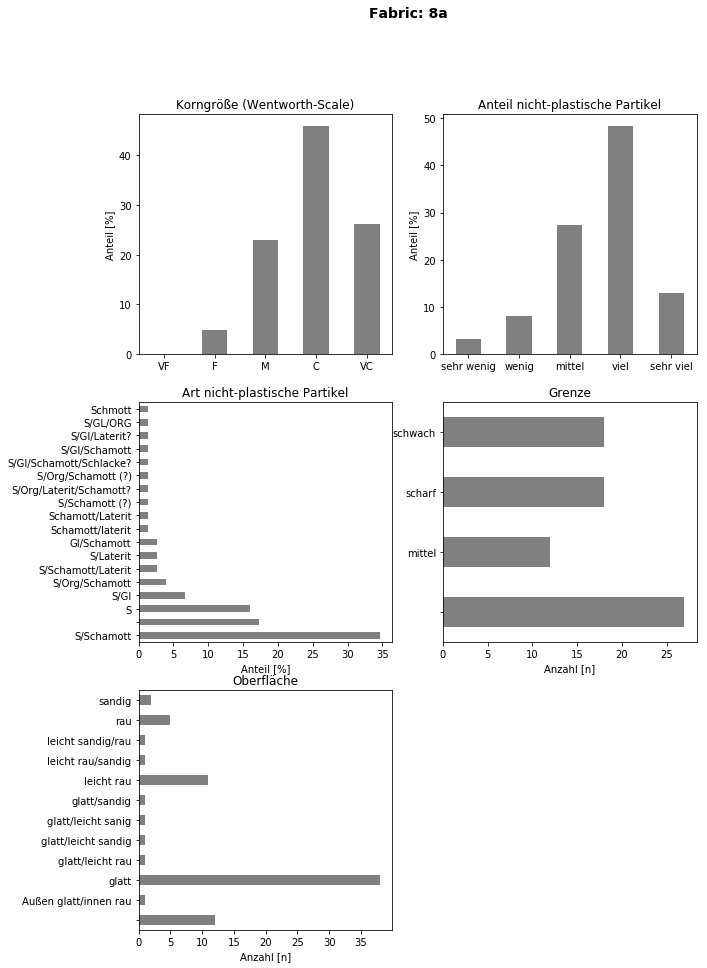

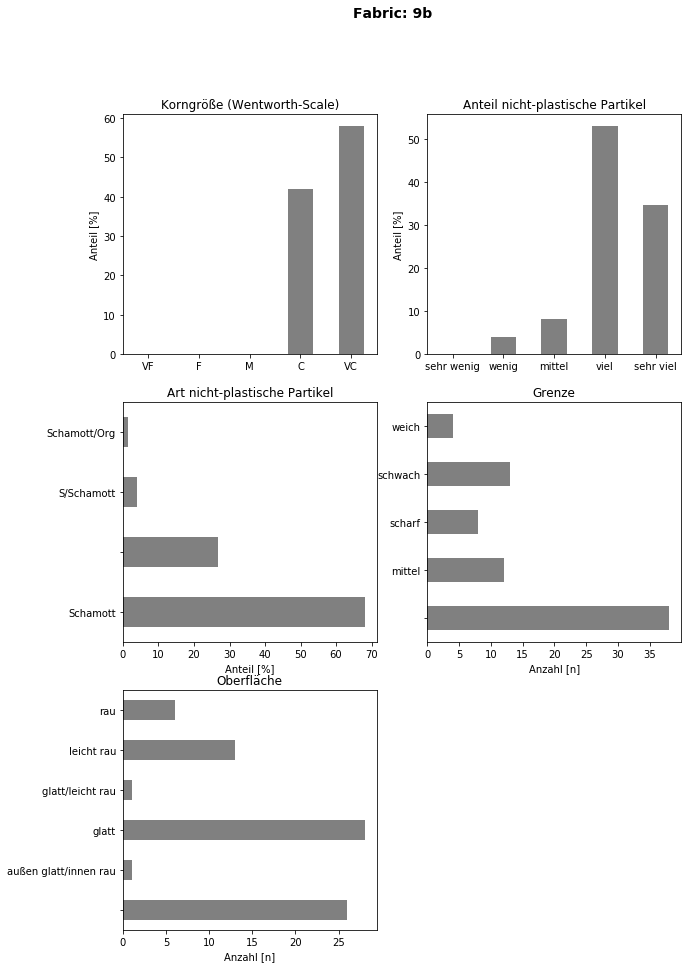

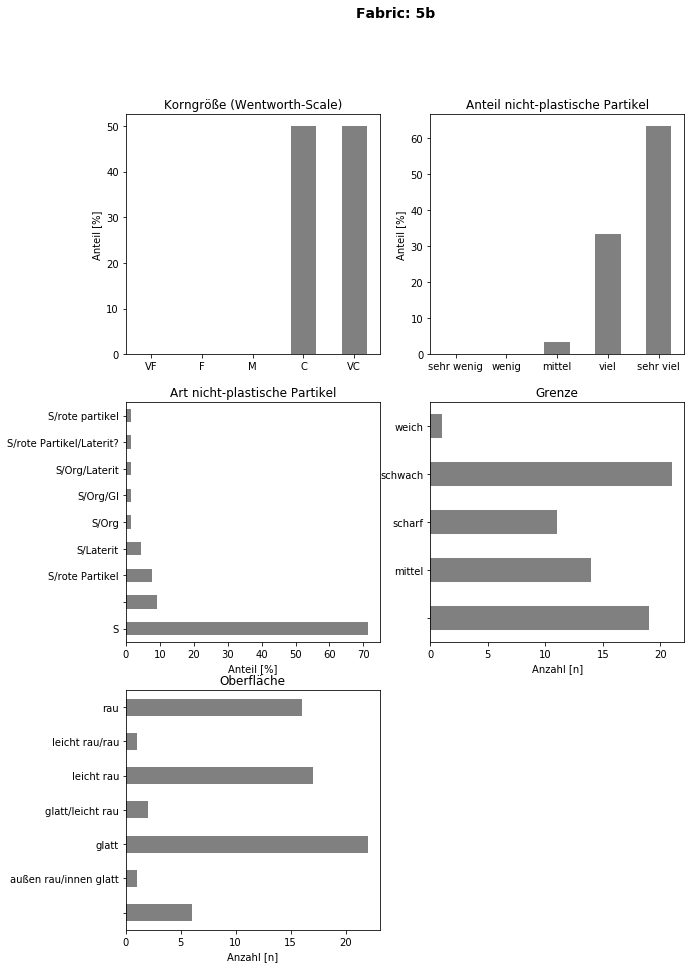

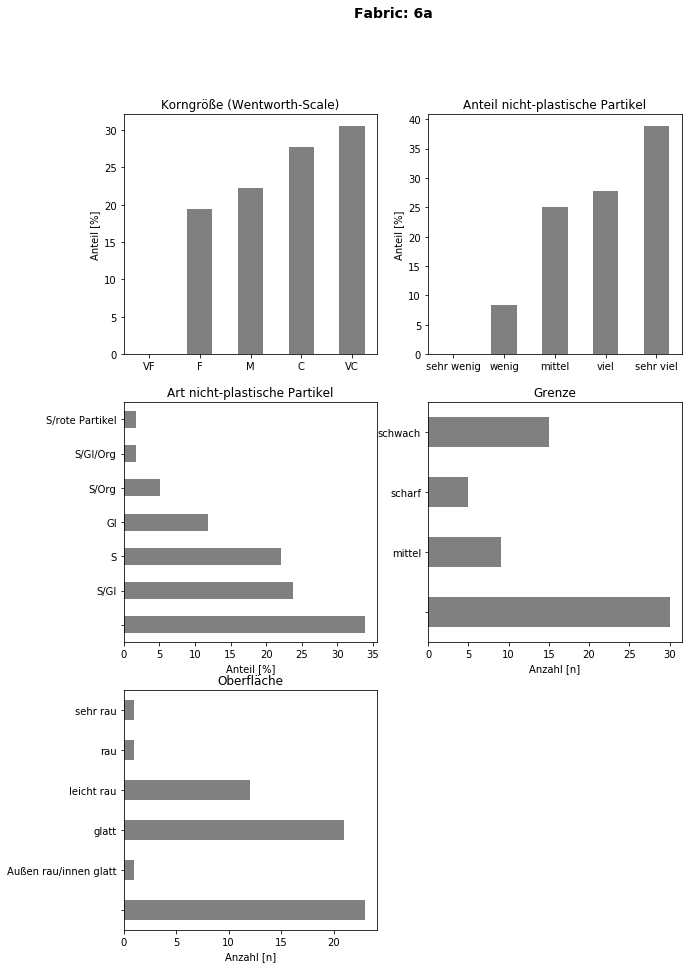

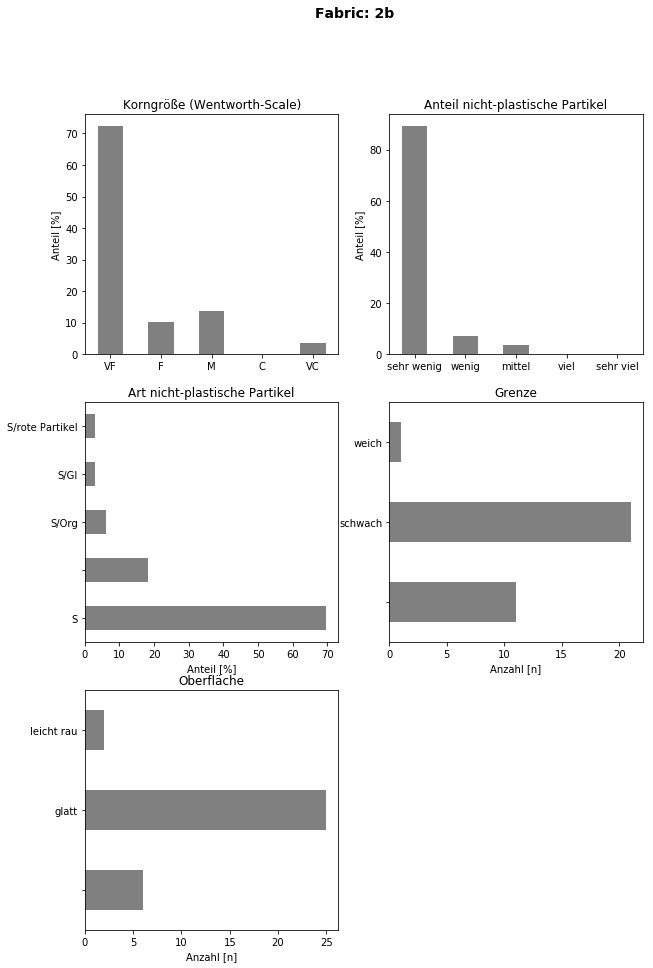

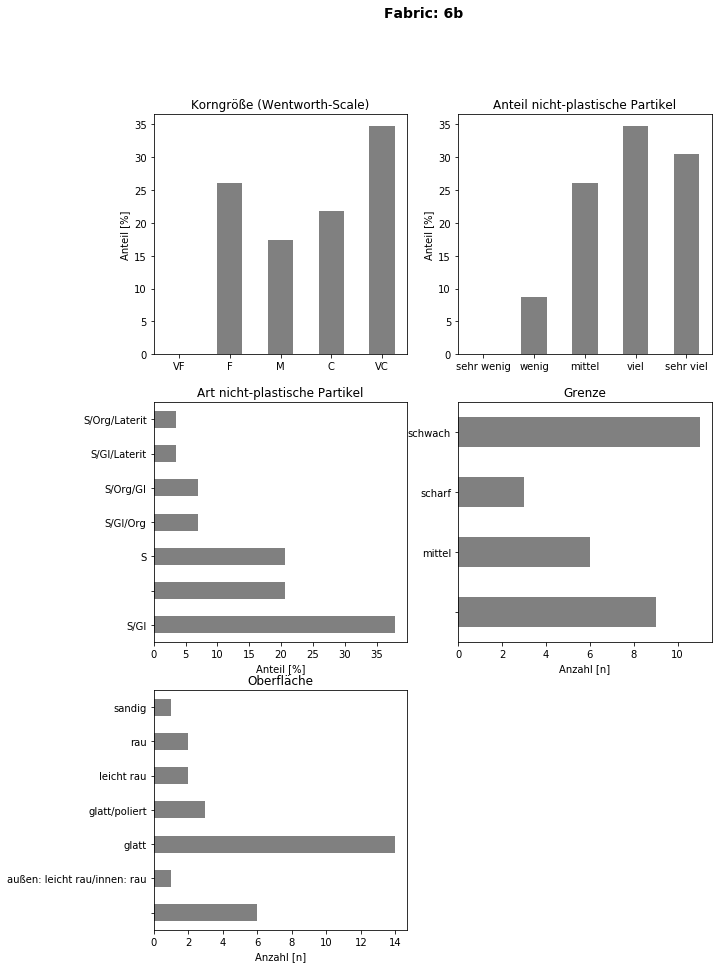

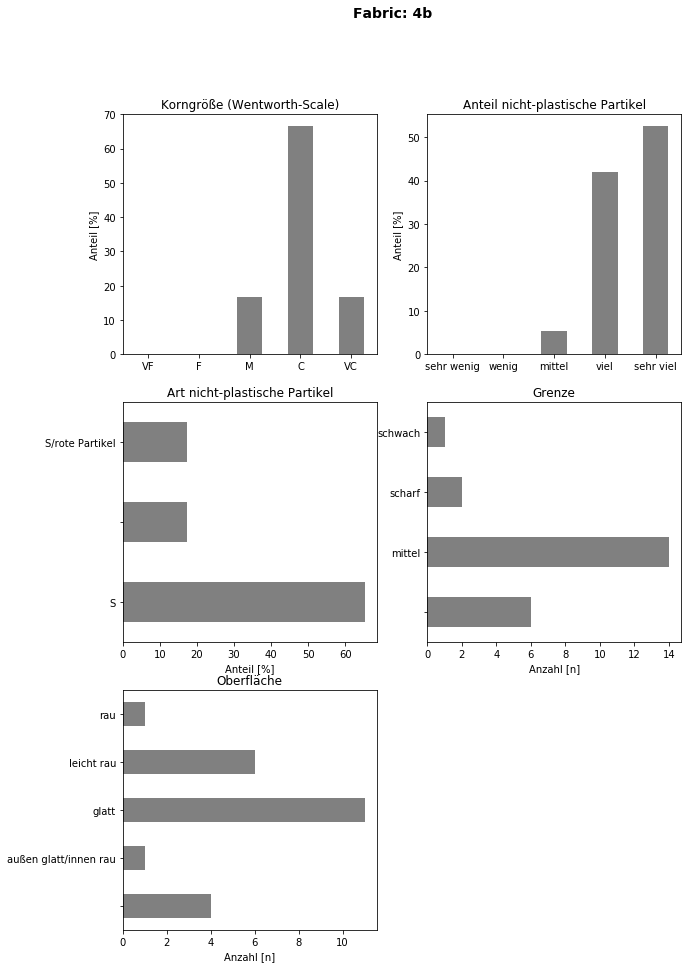

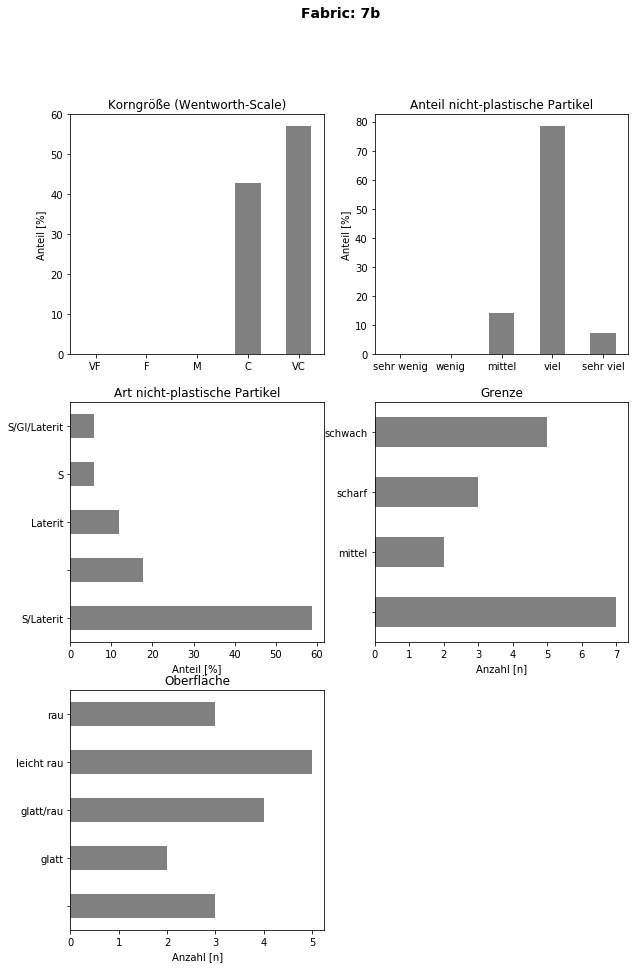

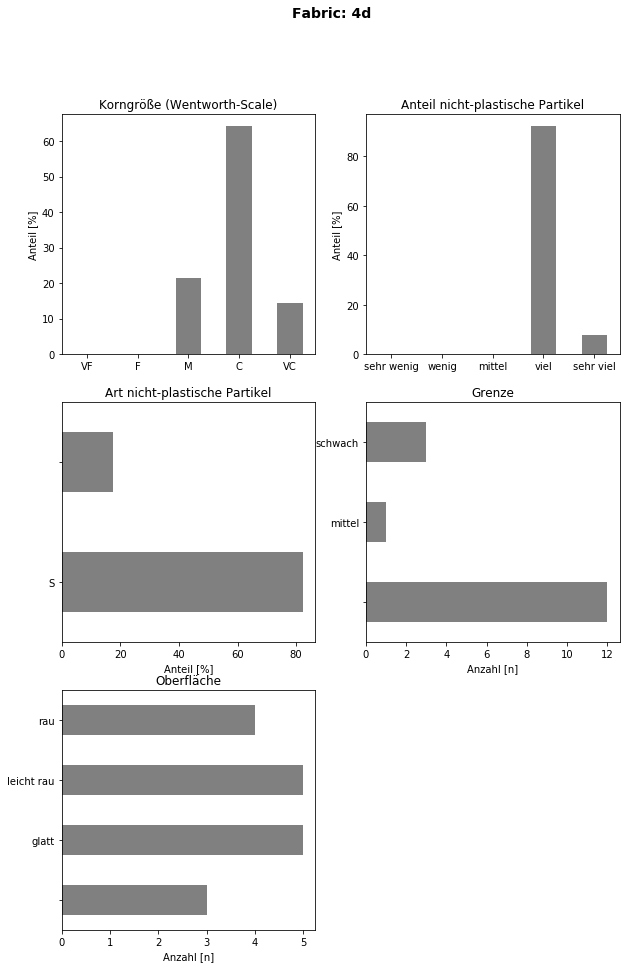

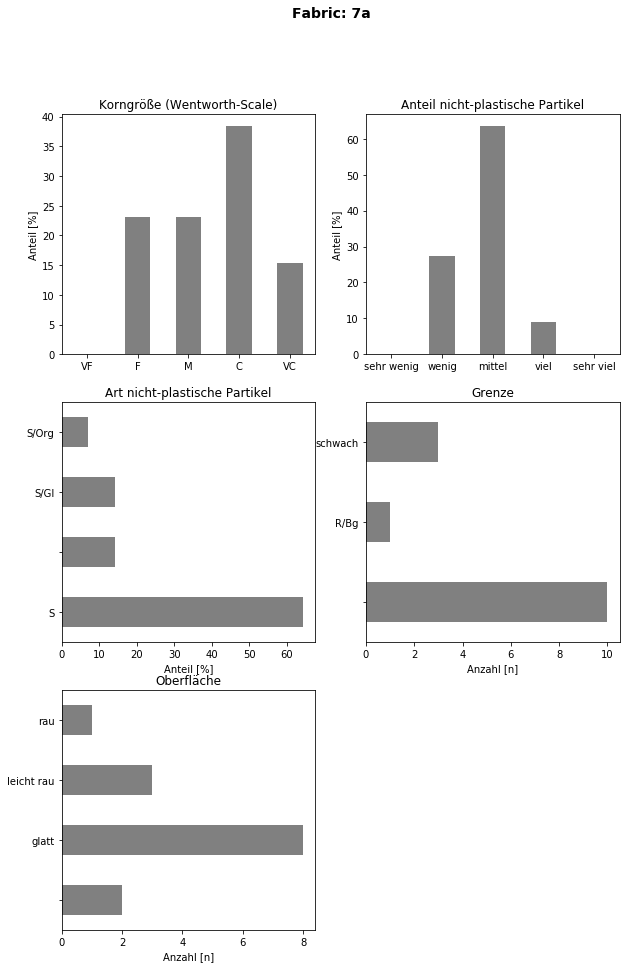

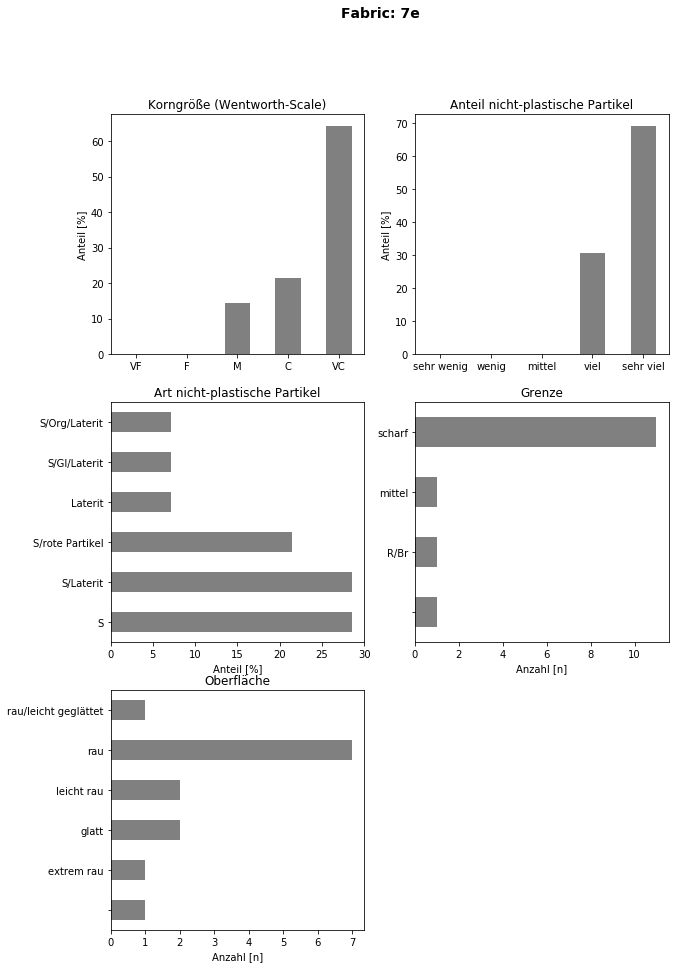

In [16]:
a = fabric_loop(fabric)

## Variabilität

1. wie viele Fabrics kommen je Fundstelle vor?

In [17]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           t_Ort.ort_fluss,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Fabric) != '')
           AND ((t_Obj.Fabric) Not Like '%?%')
           AND ((t_Obj.Fabric) Not Like '%/%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,objID,ort_kurz,ort_fluss,Fabric
0,10,BAT,Ubangi,4a
1,11,BAT,Ubangi,4c
2,12,BAT,Ubangi,3a
3,13,BAT,Ubangi,4a
4,14,BAT,Ubangi,4a


In [18]:
df_pivot = df.pivot_table(values = 'Fabric', index = ['ort_kurz', 'ort_fluss'],  aggfunc = lambda x: len(x.unique()))
df_pivot = pd.DataFrame(df_pivot)
display(df_pivot.head())

,,Fabric
ort_kurz,ort_fluss,
BAT,Ubangi,10
BBL,Ubangi,15
BBS,Sangha,13
BDA,Sangha,14
BGA,Sangha,6


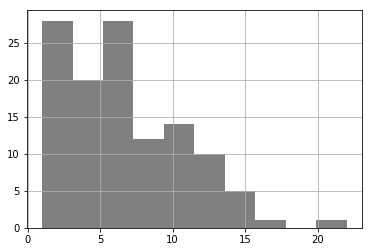

In [19]:
df_pivot['Fabric'].hist(color = 'grey')

In [20]:
# Multiindex zurücksetzen
df_pivot = df_pivot.reset_index()

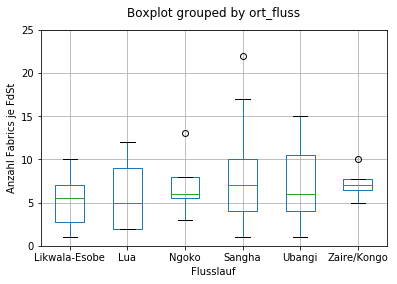

In [21]:
df_pivot.boxplot(by = 'ort_fluss')
plt.xlabel("Flusslauf")
plt.ylabel("Anzahl Fabrics je FdSt")
plt.ylim([0,25]) 
plt.title("")
plt.savefig('../output/figs/2-2-1-2_Keramik_Fabrics_Variation_Fluss.pdf', bbox_inches='tight')

Mittelwert für Variation je Flusslauf:

In [22]:
df_pivot1 = df_pivot.pivot_table(values = 'Fabric', index = 'ort_fluss',  aggfunc = np.mean)
df_pivot1 = pd.DataFrame(df_pivot1)
df_pivot1.to_latex('../output/tabs/2-2-1-2_Keramik_Fabrics_Variation_Fluss.tex')
df_pivot1

,Fabric
ort_fluss,
Likwala-Esobe,5.166667
Lua,6.000000
Ngoko,7.000000
Sangha,7.378378
Ubangi,6.813953
Zaire/Kongo,7.250000


### je Stilgruppe 
*Wie viele Fabrics kommen je Stilgruppe vor?*

In [3]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Fabric) != '')
           AND ((t_Obj.Fabric) Not Like '%?%')
           AND ((t_Obj.Fabric) Not Like '%/%')
           AND ((t_Obj.Typ) Not Like '%(?)%')
           AND ((t_Obj.Typ) Not Like '%/%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# bei den Fabrics die Untergruppen 'abschneiden'
df['FabricGr'] = df['Fabric'].map(lambda x: str(x)[:-1])
df = df.replace('',np.nan, regex=True)
df = df.dropna(subset = ['FabricGr'])

In [4]:
stilgr = pd.read_csv("../lit/Wotzka1995_StilGrKuerzel.csv")
stilgr['STILGR'] = stilgr['Seidensticker'] + ' ' + stilgr['Stilgruppe']
#pd.merge(df, df_table_sub, on = 'objID', how='left')

# dictionary der Stilgruppen-Kürzel und Stilgruppen
di = stilgr.set_index('Typ').to_dict()['STILGR']

df = df.replace({"Typ": di})

Wie viele sicher einem *fabric* sowie stilgruppe zugewiesene Stücke gibt es?

In [5]:
len(df)

1886

In [6]:
a = df['Typ'].str.split(' ', expand = True)
b = a[0].str.split('.', expand = True)

b[1] = pd.to_numeric(b[1])
b[2] = pd.to_numeric(b[2])
b[3] = pd.to_numeric(b[3])

df = pd.concat([df, b], axis = 1)

In [7]:
df_pivot = df.pivot_table(values = 'objID', index = [1, 2, 3, 'Typ'], columns = 'FabricGr', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
#display(df_pivot.head())
#df_pivot

In [8]:
df_pct = df_pivot.divide(df_pivot.sum(axis=1), axis=0)
df_pct = df_pct * 100
df_pct = df_pct.reset_index()
df_pct = df_pct.set_index(df_pct['Typ'])
df_pct = df_pct[df_pct.columns[4:13]]
#df_pct

In [12]:
df_text = df_pct

df_text = df_text.replace(np.nan, 0)
df_text = df_text.round(0)
df_text = df_text.astype(int)
df_text = df_text.replace(0, '-')

#df_text = df_text.fillna('-')
#df_text = df_text.astype(str)
df_text.to_latex('../output/tabs/4-1_Fabric_pro_Stilgruppe_pct.tex')
df_text

FabricGr,1,2,3,4,5,6,7,8,9
Typ,,,,,,,,,
4.2.1.1 Batalimo-Maluba,-,-,4,38,55,1,2,-,-
4.2.1.2 Ngbanja,5,-,10,45,40,-,-,-,-
4.2.1.3 Dongo,-,-,20,34,5,-,32,8,-
4.2.1.4 Bobulu,-,-,29,32,24,-,12,3,-
4.2.1.5 Mokelo,-,-,23,23,15,-,35,4,-
4.2.1.6 Bokwango,100,-,-,-,-,-,-,-,-
4.2.1.7 Motengo-Boma,-,-,2,57,40,-,1,-,-
4.2.1.8 Kpetene,-,-,-,33,-,67,-,-,-
4.2.1.9 Dama,-,-,12,18,6,41,24,-,-


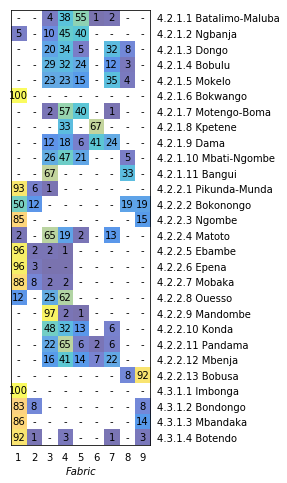

In [10]:
f = plt.figure()
f.set_size_inches(12, 8)

ax = f.add_subplot(111)
ax.yaxis.tick_right()

#plt.imshow(df_pct, interpolation='nearest', cmap='Spectral_r')
plt.imshow(df_pct, interpolation='nearest', cmap=parula_map, alpha=.66)

for (i, j), z in np.ndenumerate(df_text):
    plt.text(j, i, z, ha='center', va='center')

plt.yticks(range(len(df_pct.index)), df_pct.index)
plt.xticks(range(len(df_pct.columns)), df_pct.columns)
plt.xlabel('Fabric', style='italic')
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

plt.savefig('../output/figs/4-1_Fabric_pro_Stilgruppe_pct.pdf', bbox_inches='tight')
plt.show()

In [31]:
a = df_pct.count(axis = 1)
a = pd.DataFrame(a)
a.head()

,0
Typ,
4.2.1.1 Batalimo-Maluba,5
4.2.1.2 Ngbanja,4
4.2.1.3 Dongo,5
4.2.1.4 Bobulu,5
4.2.1.5 Mokelo,5


In [32]:
a.describe()

,0
count,27.000000
mean,3.555556
std,1.395965
min,1.000000
25%,2.500000
50%,4.000000
75%,5.000000
max,5.000000


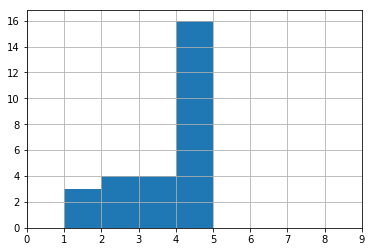

In [33]:
bins = a[0].max() - a[0].min()

a[0].hist(bins = bins)
plt.xlim([0,9])
plt.show()

## Korrespondenzanalyse mit *Fabrics* und Keramikgruppen

Bedingungen
* keine unklaren *fabrics* mit ? oder /
* keine unklaren Typen mit ? oder /

In [34]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Fabric
       FROM t_Obj
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Fabric) Not Like '%?%')
           AND ((t_Obj.Fabric) Not Like '%/%')
           AND ((t_Obj.Typ) != '')
           AND ((t_Obj.Typ) Not Like '%?%')
           AND ((t_Obj.Typ) Not Like '%/%')
           AND ((t_Obj.Typ) Not Like '%herd%')
           AND ((t_Obj.Typ) Not Like '%Pfei%')
           AND ((t_Obj.Typ) Not Like '%Roul%')
           AND ((t_Obj.Typ) Not Like '%rez%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,objID,Typ,Fabric
0,10,MBN,4a
1,21,BBL,4a
2,22,BBL,5a
3,29,BOT,1b
4,31,Bokele,1d


> ToDo's: abprüfen, das Werte <2 nicht vorkommen?

In [35]:
# bei den Fabrics die Untergruppen 'abschneiden'
df['Fabric'] = df['Fabric'].map(lambda x: str(x)[:-1])
df = df.replace('',np.nan, regex=True)
df = df.dropna(subset = ['Fabric'])

In [36]:
df_pivot = df.pivot_table(values = 'objID', index = 'Fabric', columns = 'Typ', aggfunc = len, fill_value = 0)
# display(df_pivot.head())

In [37]:
display(df_pivot.head())

Typ,BAN,BBL,BBS,BDG,BKW,BOG,BOT,BTM,Bokele,DAM,...,MBN,MDB,MKA,MKL,MTB,NGB,NGO,OUE,PDM,PKM
Fabric,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,11,10,8,70,0,1,0,...,0,0,44,0,0,1,17,1,0,351
2,0,0,0,1,0,2,3,0,1,0,...,0,0,4,0,0,0,0,0,0,23
3,2,10,0,0,0,0,0,7,0,2,...,5,151,1,6,2,2,0,2,12,4
4,0,11,0,0,0,0,2,61,0,3,...,9,3,1,6,62,9,0,5,35,0
5,0,8,0,0,0,0,0,88,0,1,...,4,1,0,4,44,8,0,0,3,0


In [38]:
# Tabelle in CSV schreiben, um sie an anderer Stelle zu nutzen:
df_pivot.to_csv('../data/processed/2-2-1-2_Fabrics-keramStilgr_CA.csv', encoding='utf-8')

> CA in R

## Angeschliffene Stücke

In [39]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Fabric,
           t_Obj.Anschliff
       FROM t_Obj
       WHERE ((t_Obj.Anschliff) != '')""".replace('\n',' ')

df = pd.read_sql(sql, con)

a = len(df)
a

381

In [40]:
# Alle Scherben:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl
       FROM t_Obj
       WHERE (((t_Obj.Art) = 'K')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
b = np.nansum(df['Anzahl'])
b

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


8527.0

In [41]:
print("Angeschliffene Stücke: ", a / b * 100, "%")

Angeschliffene Stücke:  4.46815996247 %


## sicher bestimmte Fabrics an Anschliffen

In [42]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Fabric,
           t_Obj.Anschliff
       FROM t_Obj
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Fabric) Not Like '%?%')
           AND ((t_Obj.Fabric) Not Like '%/%')
           AND ((t_Obj.Anschliff) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df_pivot = df.pivot_table(values = 'objID', index = 'Fabric', columns = 'Anschliff', aggfunc = len, fill_value = 0)
#display(df_pivot.head())
df_pivot

Anschliff,x
Fabric,
1a,7
1b,37
1c,5
1d,36
1e,16
2a,7
2b,5
3a,26
3b,21


In [43]:
sum(df['Anzahl'])

355

## erste Test-Serie von 2012
Ich hatte die unterschiedlichen Herkunftsgebiet der Stücke in der Spalte 'Region' verzeichnet! Dieses Verfahren habe ich bei späteren Anschliff-Serien nicht mehr angewandt.

In [44]:
# Alle Scherben:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Region
       FROM t_Obj
       WHERE (((t_Obj.Art) = 'K')
           AND ((t_Obj.Region) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)

a = pd.Series({'Arbeitsgebiet':len(df[df['Region'].str.contains("NW-Kongo")].index),
               'Inneres Kongobecken':len(df[df['Region'].str.contains("Inneres")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,0,Prozent
Arbeitsgebiet,20,44.444444
Inneres Kongobecken,25,55.555556


### Material aus dem Inneren Kongobecken

In [45]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           [t_Ort].[ort_name] || ' (Fpl.~' || [t_Ort].[Kat-Nr] || ')' AS ORT,
           [t_Ort].[ort_kurz] || ' ' || [t_komplex].[bef_nr] || '' || [t_obj].[Individuum] AS Obj,
           [t_Ort].[Kat-Nr],
           t_Ort.ort_fluss,
           t_Obj.Fabric,
           t_Obj.Anschliff,
           t_Obj.Typ,
           t_Ort.x_long,
           t_Ort.y_lat
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'Wotzka 1995')
           AND ((t_Obj.Fabric) != '')
           AND ((t_Obj.Anschliff) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,objID,ort_kurz,ORT,Obj,Kat-Nr,ort_fluss,Fabric,Anschliff,Typ,x_long,y_lat
0,29,BEN,Benkombo (Fpl.~24a),BEN 81/1/IV:5,24a,Ruki,1b,x,BOT,18.886707,-0.253658
1,31,BKE,Bokele (Fpl.~14),BKE 81/2-1:13,14,Ruki,1d,x,Bokele,18.592120,-0.099389
2,32,BKE,Bokele (Fpl.~14),BKE 81/2-2:9,14,Ruki,2a,x,Bokele,18.592120,-0.099389
3,33,BKE,Bokele (Fpl.~14),BKE 81/3-1:16,14,Ruki,2b,x,LON,18.592120,-0.099389
4,34,BKE,Bokele (Fpl.~14),BKE 81/458,14,Ruki,1b,x,MBA,18.592120,-0.099389
5,35,BKE,Bokele (Fpl.~14),BKE 81/4165,14,Ruki,1d,x,None,18.592120,-0.099389
6,66,BOK,Bokuma (Fpl.~18),BOK 1052,18,Ruki,3c,x,IKE,18.697792,-0.114356
7,67,BON,Bonkake (Fpl.~47),BON 81/1/I:53,47,Momoyo,1d,x,IMB,19.846767,-0.839629
8,119,IKE,Ikenge (Fpl.~20),IKE 81/112,20,Ruki,1e,x,IKE,18.781467,-0.121739
9,120,IKE,Ikenge (Fpl.~20),IKE 81/125,20,Ruki,1d,x,BDG/MBA (?),18.781467,-0.121739


In [46]:
len(df.index)

25

In [47]:
df_pivot = df.pivot_table(values = 'objID', index = ('Fabric'), aggfunc = len, fill_value = 0)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['pct'] = df_pivot['objID'] / df_pivot['objID'].sum() * 100
df_pivot

,objID,pct
Fabric,,
1b,10,40.0
1d,8,32.0
1e,3,12.0
2a,1,4.0
2b,2,8.0
3c,1,4.0


In [48]:
# Verzierungsvarianten (alles hinter der 3. Stelle) abschneiden
df['FabricGr'] = df['Fabric'].map(lambda x: str(x)[:1])

df_pivot = df.pivot_table(values = 'objID', index = ('FabricGr'), aggfunc = len, fill_value = 0)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['pct'] = df_pivot['objID'] / df_pivot['objID'].sum() * 100
df_pivot

,objID,pct
FabricGr,,
1,21,84.0
2,3,12.0
3,1,4.0


In [49]:
df_pivot = df.pivot_table(values = 'objID', index = ('ORT', 'Kat-Nr', 'x_long', 'y_lat'), aggfunc = len, fill_value = 0)
df_pivot = df_pivot.reset_index()
df_pivot.sort_values(by = 'Kat-Nr', ascending=False)

,ORT,Kat-Nr,x_long,y_lat,objID
6,Iyonda (Fpl.~8),8,18.184492,-0.037076,1
3,Bonkake (Fpl.~47),47,19.846767,-0.839629,1
5,Imbonga (Fpl.~43),43,19.788493,-0.821913,5
0,Benkombo (Fpl.~24a),24a,18.886707,-0.253658,1
7,Longa (Fpl.~24),24,18.881382,-0.247706,2
4,Ikenge (Fpl.~20),20,18.781467,-0.121739,3
2,Bokuma (Fpl.~18),18,18.697792,-0.114356,1
10,Nkile (Fpl.~17),17,18.677862,-0.111339,1
1,Bokele (Fpl.~14),14,18.592120,-0.099389,5
9,Mondjo (Fpl.~133),133,19.269369,0.347772,1


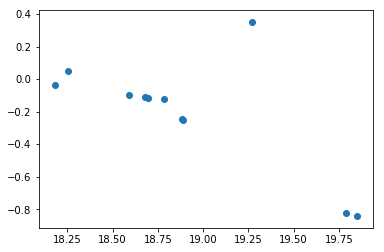

In [50]:
x1 = df_pivot['x_long']
y1 = df_pivot['y_lat']
plt.scatter(x1, y1)

In [51]:
df_pivot = df.pivot_table(values = 'objID', index = ['Kat-Nr', 'ort_kurz'], columns = 'Typ', aggfunc = len, fill_value = 0)
# df_pivot

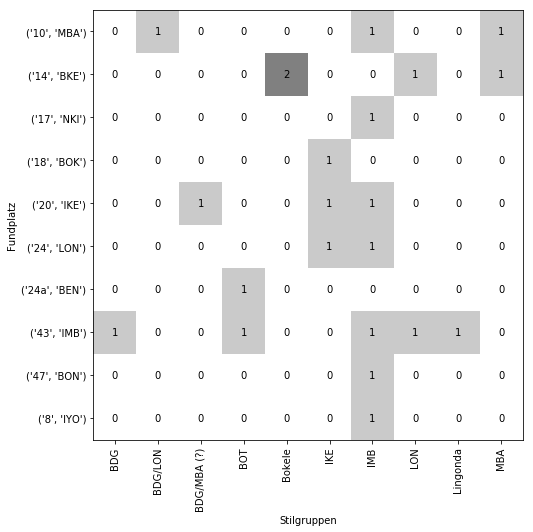

In [52]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Fundplatz')
plt.xlabel('Stilgruppen')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation=90)
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

In [53]:
df_pivot = df.pivot_table(values = 'objID', index = 'Fabric', columns = 'Typ', aggfunc = len, fill_value = 0)
# df_pivot

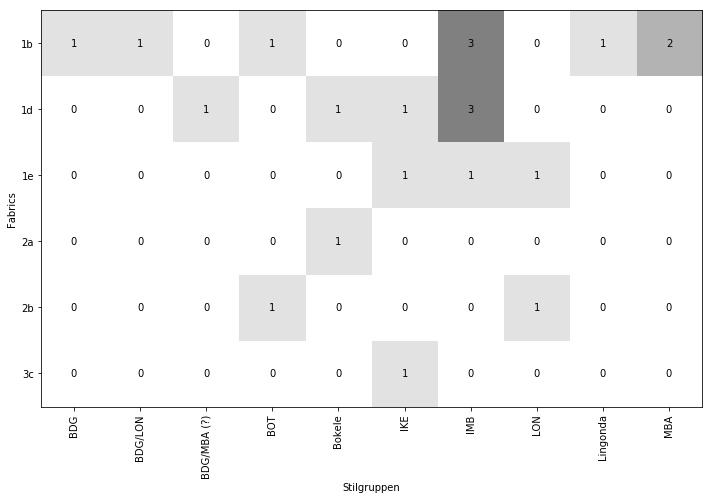

In [54]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Fabrics')
plt.xlabel('Stilgruppen')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation=90)
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

### Anteil angeschliffener Stücke je *fabric*

In [55]:
# angeschliffen Stüeck
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Fabric,
           t_Obj.Anschliff,
           t_Obj.Typ
       FROM t_Obj
       WHERE ((t_Obj.Art) = 'K')""".replace('\n',' ')

df = pd.read_sql(sql, con)

df_pivot = df.pivot_table(values = 'objID', index = 'Fabric', columns = 'Anschliff', aggfunc = len)
df_pivot = df_pivot.reset_index()
display(df_pivot.head())

Anschliff,Fabric,,x
0,,2.0,NaN
1,1 (?),66.0,NaN
2,1/3 (?),1.0,NaN
3,1/3c (?),1.0,NaN
4,1/3c/8a (?),1.0,NaN


In [56]:
a = pd.Series({'angeschliffen':df_pivot['x'].mean(),
               'nicht angeschliffen':df_pivot[''].mean()})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
angeschliffen,9.631579,29.375133
nicht angeschliffen,23.156627,70.624867


In [57]:
df_pivot['Prozent'] = df_pivot['x'] / df_pivot[''] * 100
# in einigen Fällen sind mehr Srücke angeschliffen, als nicht angeschliffen
df_pivot['Prozent'].mean()

19.844881847413014

(0, 100)

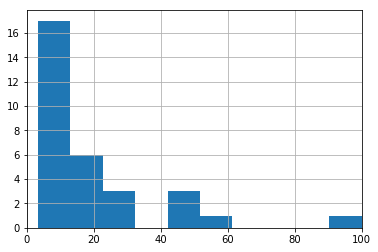

In [58]:
df_pivot['Prozent'].hist()
plt.xlim([0,100])

### Anteil angeschliffener Stücke je Stilgruppe

In [59]:
# angeschliffen Stüeck mit Stilgruppen-Zuweisung
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Fabric,
           t_Obj.Anschliff,
           t_Obj.Typ
       FROM t_Obj
       WHERE (((t_Obj.Typ) != '')
           AND ((t_Obj.Art) = 'K'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

len(df.index)

3649

In [60]:
df_pivot = df.pivot_table(values = 'objID', index = 'Typ', columns = 'Anschliff', aggfunc = len)
df_pivot = df_pivot.reset_index()
display(df_pivot.head())

Anschliff,Typ,,x
0,BAN,6.0,NaN
1,BAN (?),4.0,NaN
2,BBL,33.0,2.0
3,BBL (?),19.0,6.0
4,BBS,71.0,NaN


In [61]:
a = pd.Series({'angeschliffen':df_pivot['x'].mean(),
               'nicht angeschliffen':df_pivot[''].mean()})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
angeschliffen,2.914894,9.045101
nicht angeschliffen,29.311321,90.954899


In [62]:
df_pivot['Prozent'] = df_pivot['x'] / df_pivot[''] * 100
# in einigen Fällen sind mehr Srücke angeschliffen, als nicht angeschliffen
df_pivot['Prozent'].mean()

45.43389077722618

(0, 100)

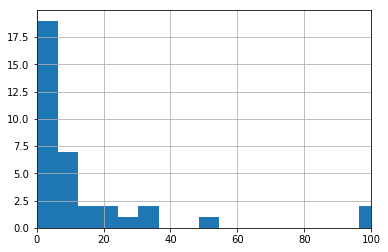

In [63]:
df_pivot['Prozent'].hist(bins = 100)
plt.xlim([0,100])

## Bestimmung sicher/unsicher

### angeschliffene Stücke

In [64]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Fabric,
           t_Obj.Anschliff
       FROM t_Obj
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Anschliff) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

a = pd.Series({'sicher':len(df[~df['Fabric'].str.contains("( )")].index),
               'unsicher':len(df[df['Fabric'].str.contains("( )")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,0,Prozent
sicher,355,96.994536
unsicher,11,3.005464


### insgesamt

In [65]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Fabric,
           t_Obj.Anschliff
       FROM t_Obj
       WHERE (((t_Obj.Fabric) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

a = pd.Series({'sicher':len(df[~df['Fabric'].str.contains("( )")].index),
               'unsicher':len(df[df['Fabric'].str.contains("( )")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,0,Prozent
sicher,4304,91.418862
unsicher,404,8.581138


## Fabrics-Tortendiagramme - Export für GIS

In [66]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz, 
           t_Ort.x_long AS X, 
           t_Ort.y_lat AS Y, 
           t_Obj.Anzahl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Fabric) Not Like '%/%')
           AND ((t_Obj.Fabric) Not Like '%(?)%')
           AND ((t_Ort.ort_lit) = 'DS'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# nur grober Typ (alle Buchstaben raus):
df['Fabric'] = df['Fabric'].replace(regex = True, to_replace = r'\D', value = r'')

display(df.head())

,objID,ort_kurz,X,Y,Anzahl,Fabric
0,10,BAT,18.594438,3.710706,1,4
1,11,BAT,18.594438,3.710706,1,4
2,12,BAT,18.594438,3.710706,1,3
3,13,BAT,18.594438,3.710706,1,4
4,14,BAT,18.594438,3.710706,1,4


In [67]:
df_pivot = df.pivot_table(values = 'objID', index = ['ort_kurz', 'X', 'Y'], columns = 'Fabric', aggfunc = len, fill_value = 0)

Um Einzelfunde und sehr kleine Inventare aus der Beobachtung herauszuhalten wird eine Schwellwert von mind. 10 Stücken je Fpl. definiert. Alle Fpl. mit weniger Stücken werden entfernt:

In [68]:
df_pivot = df_pivot.loc[df_pivot.sum(axis=1) > 5]

Prozent je Fpl ermitteln:

In [69]:
df_perc = df_pivot.divide(df_pivot.sum(axis=1), axis=0)
df_perc = df_perc.round(decimals = 2)

df_perc = df_perc.reset_index()

df_perc.to_csv('../data/processed/4_Fabrics_GIS.csv', index = False, encoding='utf-8')

display(df_perc.head())

Fabric,ort_kurz,X,Y,1,2,3,4,5,6,7,8,9
0,BAT,18.594438,3.710706,0.00,0.00,0.33,0.41,0.15,0.04,0.07,0.00,0.00
1,BBL,18.042886,1.441145,0.13,0.00,0.26,0.42,0.13,0.00,0.04,0.02,0.00
2,BBS,16.917098,-1.052349,0.14,0.02,0.05,0.02,0.00,0.00,0.00,0.03,0.74
3,BDA,16.084390,2.189246,0.03,0.00,0.10,0.29,0.39,0.06,0.13,0.00,0.00
4,BGA,16.873263,-1.117121,0.17,0.00,0.00,0.00,0.00,0.00,0.02,0.13,0.67


### Testserie aus dem Inneren Kongobecken (Wotzka 1995)

In [70]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz, 
           t_Ort.x_long AS X, 
           t_Ort.y_lat AS Y, 
           t_Obj.Anzahl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Fabric) Not Like '%/%')
           AND ((t_Obj.Fabric) Not Like '%(?)%')
           AND ((t_Ort.ort_lit) != 'DS'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# nur grober Typ (alle Buchstaben raus):
df['Fabric'] = df['Fabric'].replace(regex = True, to_replace = r'\D', value = r'')

# display(df.head())

In [71]:
df_pivot = df.pivot_table(values = 'objID', index = ['ort_kurz', 'X', 'Y'], columns = 'Fabric', aggfunc = len, fill_value = 0)

In [72]:
df_pivot

,,Fabric,1,2,3,4,5,9
ort_kurz,X,Y,,,,,,
BEN,18.886707,-0.253658,1,0,0,0,0,0
BKE,18.592120,-0.099389,3,2,0,0,0,0
BOK,18.697792,-0.114356,0,0,1,0,0,0
BON,19.846767,-0.839629,1,0,0,0,0,0
IKE,18.781467,-0.121739,3,0,0,0,0,0
IMB,19.788493,-0.821913,4,1,0,0,0,0
IYO,18.184492,-0.037076,1,0,0,2,1,1
LON,18.881382,-0.247706,2,0,0,0,0,0
MBA,18.256204,0.047734,4,0,0,0,0,0


In [73]:
df_perc = df_pivot.divide(df_pivot.sum(axis=1), axis=0)
df_perc = df_perc.round(decimals = 2)

df_perc = df_perc.reset_index()

df_perc.to_csv('../data/processed/4_FabricsICB_GIS.csv', index = False, encoding='utf-8')

display(df_perc.head())

Fabric,ort_kurz,X,Y,1,2,3,4,5,9
0,BEN,18.886707,-0.253658,1.0,0.0,0.0,0.0,0.0,0.0
1,BKE,18.592120,-0.099389,0.6,0.4,0.0,0.0,0.0,0.0
2,BOK,18.697792,-0.114356,0.0,0.0,1.0,0.0,0.0,0.0
3,BON,19.846767,-0.839629,1.0,0.0,0.0,0.0,0.0,0.0
4,IKE,18.781467,-0.121739,1.0,0.0,0.0,0.0,0.0,0.0


### Brennfarbe

In [74]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe,
           t_Obj.Typ,
           t_Obj.Fabric,
           t_Ort.x_long,
           t_Ort.y_lat
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['x_long'] = df['x_long'].convert_objects(convert_numeric=True)
df['y_lat'] = df['y_lat'].convert_objects(convert_numeric=True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [75]:
# Summe aller Datensätze
len(df.index)

4701

In [76]:
# Datensätze mit W in der Farbe
df_W = df[df['Farbe'].str.contains("W")]
len(df_W.index)

ValueError: cannot index with vector containing NA / NaN values

In [ ]:
df_pivot = df_W.pivot_table(values = 'objID', index = 'Typ', aggfunc = len, fill_value = 0)
display(df_pivot.head())

### Kartierung

In [ ]:
df_pivot = df_W.pivot_table(values = 'objID', index = ('ort_kurz', 'x_long', 'y_lat'), aggfunc = len, fill_value = 0)
df_pivot = df_pivot.reset_index()
# display(df_pivot.head())

In [ ]:
# Datensätze, die kein W in der Farbe haben
# !!! die ~ invertiert die contain-Aussage!!!
df_notW = df[~df['Farbe'].str.contains("W")]
len(df_notW.index)

In [ ]:
df_pivot_notW = df_notW.pivot_table(values = 'objID', index = ('ort_kurz', 'x_long', 'y_lat'), aggfunc = len, fill_value = 0)
df_pivot_notW = df_pivot_notW.reset_index()

In [ ]:
# weiß-brennend
x1 = df_pivot['x_long']
y1 = df_pivot['y_lat']
s1 = df_pivot['objID']

# nicht-weiß-brennend
x2 = df_pivot_notW['x_long']
y2 = df_pivot_notW['y_lat']
s2 = df_pivot_notW['objID']

fig = plt.figure(1)
fig.set_size_inches(12, 5.5)

plt.subplot(121, aspect='equal')
plt.scatter(x1, y1, s1, c='grey', alpha=0.25)
plt.title('weiß')

plt.subplot(122, aspect='equal')
plt.scatter(x2, y2, s2, c='red', alpha=0.25)
plt.title('nicht-weiß')

plt.savefig('../output/figs/2-2-1-2_Keramik_Brennfarbe_Kartierung_A.pdf', bbox_inches='tight')
plt.show()

> **Abb. #** Brennfarben: Kartierung der Summen aller Scherben

### Stilgruppen

In [ ]:
# Kreuztabelle aus weiß-brennenden Stücke und Typen
df_W = df[df['Farbe'].str.contains("W")]
df_pivot = df_W.pivot_table(values = 'objID', index = 'Typ', aggfunc = len, fill_value = 0)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['objID'], ascending=[False])
# display(df_pivot.head())

In [ ]:
# Kreuztabelle aus nicht-weiß-brennenden Stücke und Typen
df_notW = df[~df['Farbe'].str.contains("W")]
df_pivot_notW = df_notW.pivot_table(values = 'objID', index = 'Typ', aggfunc = len, fill_value = 0)
df_pivot_notW = pd.DataFrame(df_pivot_notW)
df_pivot_notW = df_pivot_notW.sort_index(by=['objID'], ascending=[False])
# display(df_pivot_notW.head())

In [ ]:
#fig = plt.figure(1)
#fig.set_size_inches(12, 5.5)

#plt.subplot(121, aspect='equal')
df_pivot[:15].plot(kind = 'barh', color = 'grey', legend = False)
plt.title('weiß')

#plt.subplot(122, aspect='equal')
df_pivot_notW[:15].plot(kind = 'barh', color = 'red', legend = False)
plt.title('nicht-weiß')

plt.savefig('../output/figs/2-2-1-2_Keramik_Brennfarbe_A.pdf', bbox_inches='tight')
plt.show()